In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [99]:
df = pd.read_csv("..\\input\\nba\\2017.csv")
len(df)

1212

In [100]:
df_clean = df[~df.line_team.isna()]
len(df_clean)

1197

In [101]:
def get_winner(row):
    if row.away_points > row.home_points:
        return row.away
    else:
        return row.home
    
df_clean["winner"] = df_clean.apply(get_winner, axis=1)

C:\Users\lsimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [102]:
df_clean[["away","away_points","home","home_points", "winner", "line_team"]].head()

,away,away_points,home,home_points,winner,line_team
0,bos,99,cle,102,cle,cle
1,hou,122,gsw,121,hou,gsw
2,mil,108,bos,100,mil,bos
3,atl,117,dal,111,atl,dal
4,cho,90,det,102,det,det


In [112]:
winner = len(df_clean.query("winner == line_team"))
losser = len(df_clean.query("winner != line_team"))
pct = winner/len(df_clean)
print(winner,"wins and", losser, "losses,", "{0:2f}".format(pct))

818 wins and 379 losses, 0.683375


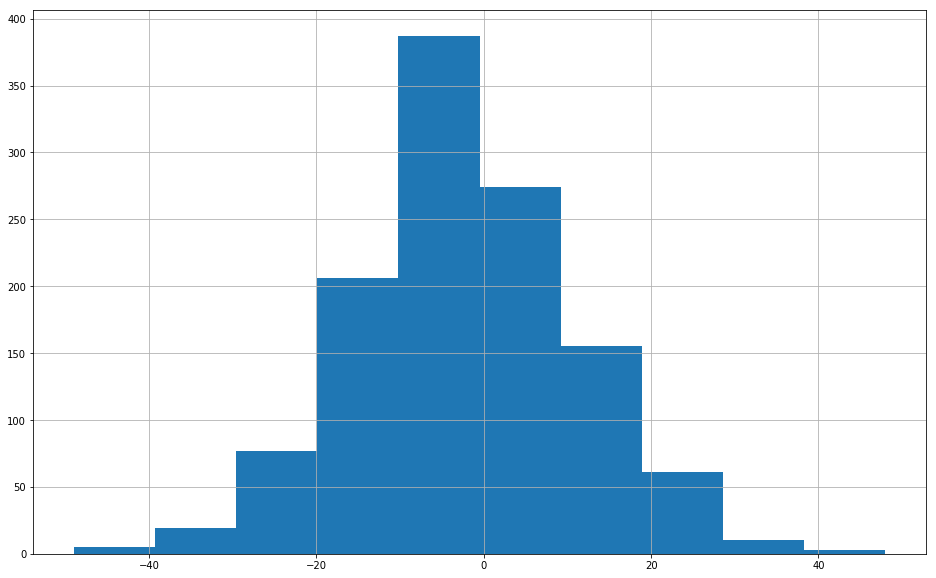

In [106]:
(df_clean["away_points"] - df_clean["home_points"]).hist(figsize=(16,10));

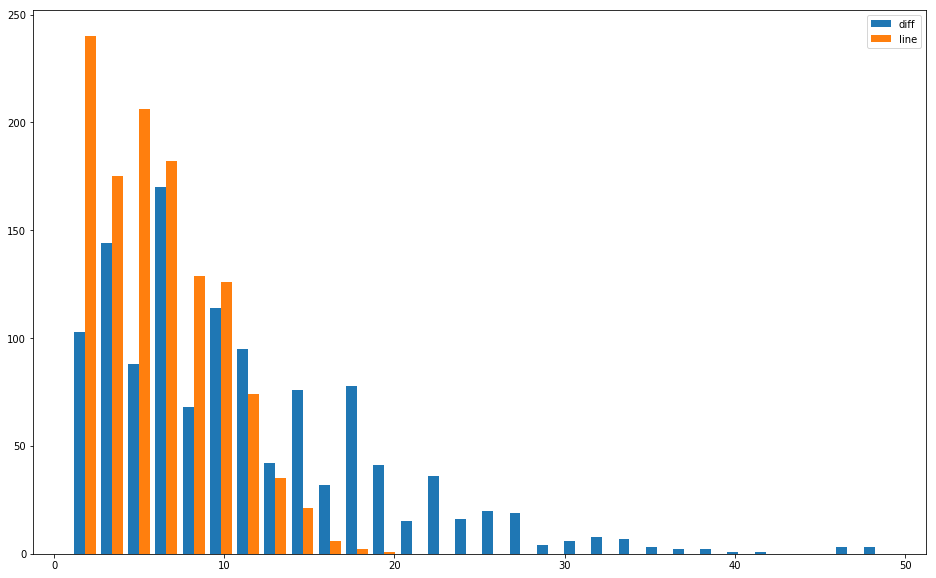

In [97]:
line_spread = df_clean["line_spread"].apply(lambda x: abs(x))
diff_spread = (df_clean["away_points"] - df_clean["home_points"]).apply(lambda x: abs(x))

plt.figure(figsize=(16,10))
plt.hist([diff_spread, line_spread], 30, label=['diff', 'line']);
plt.legend(loc='upper right');

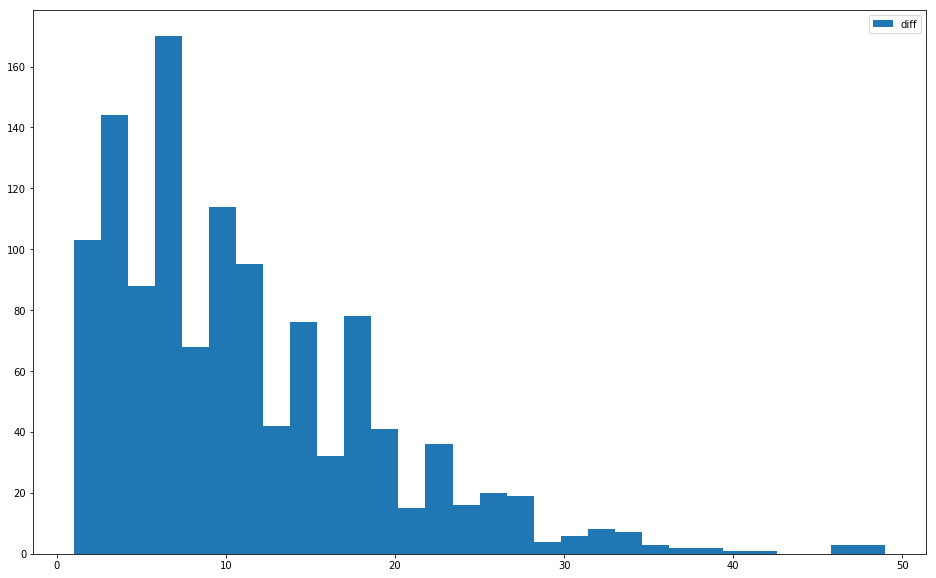

In [98]:
plt.figure(figsize=(16,10))
plt.hist([diff_spread], 30, label=['diff']);
plt.legend(loc='upper right');

In [133]:
def win_pct(df, b1, b2):
    subset = df[(df.line_spread > b1) & (df.line_spread <= b2)]
    winner = len(subset.query("winner == line_team"))
    losser = len(subset.query("winner != line_team"))
    pct = winner/len(subset)
    print(b1,"to",b2,":",winner,"wins and", losser, "losses,", "{0:2f}".format(pct))
    return pct

pcts = []
win_pct(df_clean, -2, 0)
win_pct(df_clean, -4, -2)
win_pct(df_clean, -6, -4)
win_pct(df_clean, -8, -6)
win_pct(df_clean, -10, -8)
win_pct(df_clean, -12, -10)
win_pct(df_clean, -14, -12)
win_pct(df_clean, -16, -14)
win_pct(df_clean, -18, -16)
win_pct(df_clean, -20, -18)
win_pct(df_clean, -22, -20)

-2 to 0 : 68 wins and 49 losses, 0.581197
-4 to -2 : 125 wins and 120 losses, 0.510204
-6 to -4 : 180 wins and 79 losses, 0.694981
-8 to -6 : 157 wins and 70 losses, 0.691630
-10 to -8 : 117 wins and 36 losses, 0.764706
-12 to -10 : 89 wins and 17 losses, 0.839623
-14 to -12 : 55 wins and 5 losses, 0.916667
-16 to -14 : 20 wins and 3 losses, 0.869565
-18 to -16 : 5 wins and 0 losses, 1.000000
-20 to -18 : 2 wins and 0 losses, 1.000000


ZeroDivisionError: division by zero